In [1]:
Ok = """Topics covered in this chapter:-
1) Normalization Techniques like StandardScaler, RobustScaler, MinMaxScaler and Normalizer
2) Which Algorithms require feature scaling and which do not
3) PCA
4) K-Means
5) DBSCAN (Density Based Spatial Clustering of Applications with Noise)
"""
print(Ok)

Topics covered in this chapter:-
1) Normalization Techniques like StandardScaler, RobustScaler, MinMaxScaler and Normalizer
2) Which Algorithms require feature scaling and which do not
3) PCA
4) K-Means
5) DBSCAN (Density Based Spatial Clustering of Applications with Noise)



In [2]:
# This convention would be followed by default in the book
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [3]:
# Creating a function printmd so that we can create chapter for easy vizualizations
from IPython.display import Markdown, display
def printbold(string):
    display(Markdown(string))
    
printbold('***Lets start the party bruh! ***')

***Lets start the party bruh! ***

 •	The StandardScaler in scikit-learn ensures that for each feature the mean is 0 and the variance is 1, bringing
all features to the same magnitude. However, this scaling does not ensure any particular minimum and maximum values for
the features. 

•	The RobustScaler works similarly to the StandardScaler in that it ensures statistical properties for each feature
that guarantee that they are on the same scale. However, the RobustScaler uses the median and quartiles, instead of mean
and variance. This makes the RobustScaler ignore data points that are very different from the rest
(like measurement errors). These odd data points are also called outliers, and can lead to trouble for other scaling
techniques. 
•	The MinMaxScaler, on the other hand, shifts the data such that all features are exactly between 0 and 1. For the
two-dimensional dataset this means all of the data is contained within the rectangle created by the x-axis between 0
and 1 and the y-axis between 0 and 1.
•	Finally, the

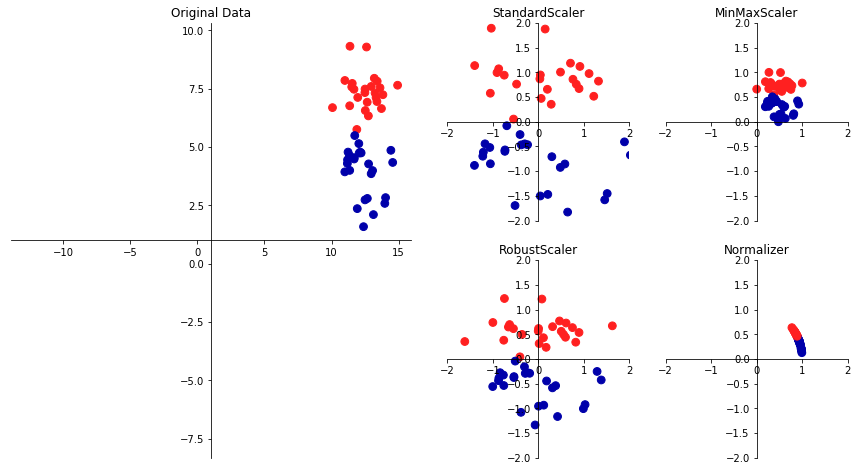

In [4]:
ok = """ •	The StandardScaler in scikit-learn ensures that for each feature the mean is 0 and the variance is 1, bringing
all features to the same magnitude. However, this scaling does not ensure any particular minimum and maximum values for
the features. 

•	The RobustScaler works similarly to the StandardScaler in that it ensures statistical properties for each feature
that guarantee that they are on the same scale. However, the RobustScaler uses the median and quartiles, instead of mean
and variance. This makes the RobustScaler ignore data points that are very different from the rest
(like measurement errors). These odd data points are also called outliers, and can lead to trouble for other scaling
techniques. 
•	The MinMaxScaler, on the other hand, shifts the data such that all features are exactly between 0 and 1. For the
two-dimensional dataset this means all of the data is contained within the rectangle created by the x-axis between 0
and 1 and the y-axis between 0 and 1.
•	Finally, the Normalizer does a very different kind of rescaling. It scales each data point such that the feature
vector has a Euclidean length of 1. In other words, it projects a data point on the circle (or sphere, in the case of
higher dimensions) with a radius of 1. This means every data point is scaled by a different number (by the inverse of
its length). This normalization is often used when only the direction (or angle) of the data matters, not the length
of the feature vector.

"""
print(ok)
mglearn.plots.plot_scaling()

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)
print("\n")
ok = """ In order to scale data, 1st we create MinMaxScaler object and then fit it on the train set. scaler.fit will
calculate min and max value for each feature. Then tranform method will actually scale the training data. The transform
method is used in  scikit-learn whenever a model returns a new representation of the data. All features of training set
would be between 0 & 1.
"""
print(ok)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

print("\n")
ok1 = """We'll apply the same min and max of train set to transform test set. hence, we only run transform on the test.
Hence, test set transformed features wont necessarily be between 0 & 1. and that is okay"""
print(ok1)
print("\n")
# transform test data# trans 
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

(426, 30)
(143, 30)


 In order to scale data, 1st we create MinMaxScaler object and then fit it on the train set. scaler.fit will
calculate min and max value for each feature. Then tranform method will actually scale the training data. The transform
method is used in  scikit-learn whenever a model returns a new representation of the data. All features of training set
would be between 0 & 1.

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.

In [6]:
printbold("**What if we scale the training and test set separately- We should never do this**")


**What if we scale the training and test set separately- We should never do this**

 The first panel is an unscaled two-dimensional dataset, with the training set shown as circles and the test set
shown as triangles. 
The second panel is the same data, but scaled using the MinMaxScaler. Here, we called fit on the training set, and then
called transform on the training and test sets. You can see that the dataset in the second panel looks identical to the
first; only the ticks on the axes have changed. Now all the features are between 0 and 1.
In the 3rd panel we scaled the training & test set separately. In this case, the minimum and maximum feature values for
both the training and the test set are 0 and 1. But now the dataset looks different. The test points moved incongruously
to the training set, as they were scaled differently. We changed the arrangement of the data in an arbitrary way.
Clearly this is not what we want to do. 



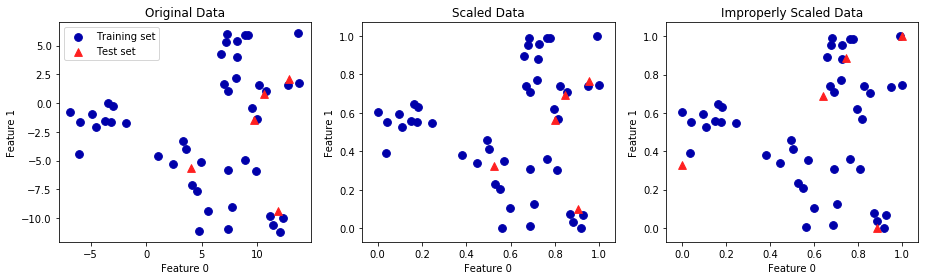

In [7]:
ok = """ The first panel is an unscaled two-dimensional dataset, with the training set shown as circles and the test set
shown as triangles. 
The second panel is the same data, but scaled using the MinMaxScaler. Here, we called fit on the training set, and then
called transform on the training and test sets. You can see that the dataset in the second panel looks identical to the
first; only the ticks on the axes have changed. Now all the features are between 0 and 1.
In the 3rd panel we scaled the training & test set separately. In this case, the minimum and maximum feature values for
both the training and the test set are 0 and 1. But now the dataset looks different. The test points moved incongruously
to the training set, as they were scaled differently. We changed the arrangement of the data in an arbitrary way.
Clearly this is not what we want to do. 
"""
print(ok)
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()


In [8]:
ok = """Which Machine learning algorithms require feature scaling?

1) All algorithms that are distance based require scaling. This includes algorithms like linear and non-linear regression,
Logistic regression, KNN, SVM, Neural Nets, Clustering algos like K-Means & hierarchical etc.

2) Algos that are used for matrix factorization, decomposition or dimensionality reductions like  PCA, SVD require scaling
to avoid bias towards high magnitude features.

3)Algos that dont need scaling are CART,RF,GBM, XGB, Naive Bayes etc. These algos rely on rules hence scaling doesnt matter.

"""
print(ok)

Which Machine learning algorithms require feature scaling?

1) All algorithms that are distance based require scaling. This includes algorithms like linear and non-linear regression,
Logistic regression, KNN, SVM, Neural Nets, Clustering algos like K-Means & hierarchical etc.

2) Algos that are used for matrix factorization, decomposition or dimensionality reductions like  PCA, SVD require scaling
to avoid bias towards high magnitude features.

3)Algos that dont need scaling are CART,RF,GBM, XGB, Naive Bayes etc. These algos rely on rules hence scaling doesnt matter.




In [9]:
printbold("**Dimensionality Reduction, Feature Extraction, and Manifold Learning using PCA, NMF & t-SNE**")

ok = """One of the simplest and most widely used algorithms for all of these is principal component analysis. We’ll also
look at two other algorithms: non-negative matrix factorization (NMF), which is commonly used for feature extraction,
and t-SNE, which is commonly used for visualization using two-dimensional scatter plots."""
print(ok)

**Dimensionality Reduction, Feature Extraction, and Manifold Learning using PCA, NMF & t-SNE**

One of the simplest and most widely used algorithms for all of these is principal component analysis. We’ll also
look at two other algorithms: non-negative matrix factorization (NMF), which is commonly used for feature extraction,
and t-SNE, which is commonly used for visualization using two-dimensional scatter plots.


Learning the PCA transformation and applying it is as simple as applying a preprocessing transformation. We
instantiate the PCA object, find the principal components by calling the fit method, and then apply the rotation and
dimensionality reduction by calling transform. By default, PCA only rotates (and shifts) the data, but keeps all principal
components. To reduce the dimensionality of the data, we need to specify how many components we want to keep when creating
the PCA object.


Original shape: (569, 30)
Reduced shape: (569, 2)


We can see that the two classes separate quite well in this two-dimensional space. This leads us to believe that
even a linear classifier (that would learn a line in this space) could do a reasonably good job at distinguishing the two
classes. We can also see that the malignant (red) points are more spread out than the benign (blue) points.


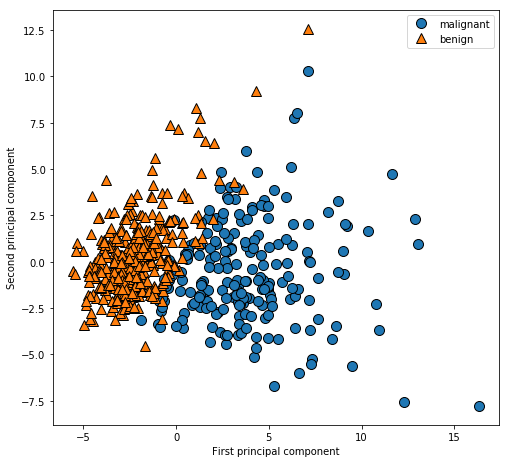

In [10]:
ok = """Learning the PCA transformation and applying it is as simple as applying a preprocessing transformation. We
instantiate the PCA object, find the principal components by calling the fit method, and then apply the rotation and
dimensionality reduction by calling transform. By default, PCA only rotates (and shifts) the data, but keeps all principal
components. To reduce the dimensionality of the data, we need to specify how many components we want to keep when creating
the PCA object."""
print(ok)
print("\n")
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

from sklearn.decomposition import PCA                          
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

 # transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
                            

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

print("\n")
ok1 = """We can see that the two classes separate quite well in this two-dimensional space. This leads us to believe that
even a linear classifier (that would learn a line in this space) could do a reasonably good job at distinguishing the two
classes. We can also see that the malignant (red) points are more spread out than the benign (blue) points."""
print(ok1)


In [11]:
Ok = """A downside of PCA is that the two axes in the plot are often not very easy to interpret. The principal components
themselves are stored in the components_ attribute of the PCA object during fitting. Each row in components_ corresponds
to one principal component, and they are sorted by their importance (the first principal component comes first, etc.).
The columns correspond to original features attribute of PCA in this example, “mean radius,” “mean texture,” and so on."""
print(Ok)
print("\n")
print("PCA component shape: {}".format(pca.components_.shape))
print("\n")
print("PCA components:\n{}".format(pca.components_))


A downside of PCA is that the two axes in the plot are often not very easy to interpret. The principal components
themselves are stored in the components_ attribute of the PCA object during fitting. Each row in components_ corresponds
to one principal component, and they are sorted by their importance (the first principal component comes first, etc.).
The columns correspond to original features attribute of PCA in this example, “mean radius,” “mean texture,” and so on.


PCA component shape: (2, 30)


PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.1903

In [12]:
printbold("**k-Means Clustering**")

**k-Means Clustering**

In [13]:
ok = """We instantiate the KMeans class, and set the number of clusters we are looking for.3 Then we call the fit method
with the data. During the algorithm, each training data point in X is assigned a cluster label. You can
find these labels in the kmeans.labels_ attribute

we can also assign cluster labels to new points, using the predict method. Each new point is assigned to the closest
cluster center when predicting, but the existing model is not changed. Running predict on the training set returns the
same result as labels_:"""
print(ok)
print("\n")
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print("Cluster memberships:\n{}".format(kmeans.labels_))
print("\n")
print("Predicted cluster membership: \n{}".format(kmeans.predict(X)))

We instantiate the KMeans class, and set the number of clusters we are looking for.3 Then we call the fit method
with the data. During the algorithm, each training data point in X is assigned a cluster label. You can
find these labels in the kmeans.labels_ attribute

we can also assign cluster labels to new points, using the predict method. Each new point is assigned to the closest
cluster center when predicting, but the existing model is not changed. Running predict on the training set returns the
same result as labels_:


Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


Predicted cluster membership: 
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [14]:
printbold("**K-Means and Heirarchical Clustering are not very well explained in this book. Reade em somewhere else!**")
print("sklearn doesnt have dendogram functionality for heirarchical clustering")

**K-Means and Heirarchical Clustering are not very well explained in this book. Reade em somewhere else!**

sklearn doesnt have dendogram functionality for heirarchical clustering


In [15]:
printbold("**DBSCAN- “density-based spatial clustering of applications with noise**")

**DBSCAN- “density-based spatial clustering of applications with noise**

Text(0,0.5,'Feature 1')

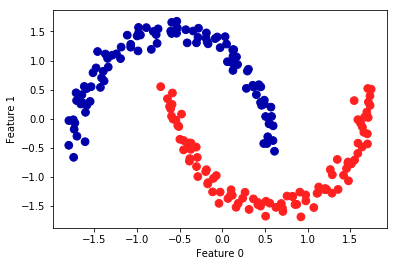

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

from  sklearn.cluster  import DBSCAN
# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [17]:
printbold("**End, Bruh!! Look at Notes for More Info!**")

**End, Bruh!! Look at Notes for More Info!**